In [1]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
df = pd.read_csv('storms.csv')
print(df.info())
print(df.describe())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22705 entries, 0 to 22704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          22705 non-null  object 
 1   year                          22705 non-null  int64  
 2   month                         22705 non-null  int64  
 3   day                           22705 non-null  int64  
 4   hour                          22705 non-null  int64  
 5   lat                           22705 non-null  float64
 6   long                          22705 non-null  float64
 7   status                        22705 non-null  object 
 8   category                      5162 non-null   float64
 9   wind                          22705 non-null  int64  
 10  pressure                      22705 non-null  int64  
 11  tropicalstorm_force_diameter  22705 non-null  int64  
 12  hurricane_force_diameter      22705 non-null  int64  
dtypes

# New Section

In [2]:
df = pd.read_csv("storms.csv")
df

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011975,1975,6,24,12,32.5,-52.0,tropical depression,NaN,20,-999,-1998,-1998
1,AL011975,1975,6,24,18,32.6,-52.6,tropical depression,NaN,25,-999,-1998,-1998
2,AL011975,1975,6,25,0,32.7,-53.2,tropical depression,NaN,25,-999,-1998,-1998
3,AL011975,1975,6,25,60,32.8,-53.2,tropical depression,NaN,25,-999,-1998,-1998
4,AL011975,1975,6,25,12,33.0,-54.5,tropical depression,NaN,25,-999,-1998,-1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22700,Sara,2024,11,17,60,16.5,-87.5,tropical storm,NaN,35,1001,120,0
22701,Sara,2024,11,17,12,16.8,-87.9,tropical storm,NaN,35,1001,110,0
22702,Sara,2024,11,17,14,17.0,-88.3,tropical storm,NaN,35,1001,110,0
22703,Sara,2024,11,17,18,17.4,-89.1,tropical depression,NaN,30,1003,0,0


In [4]:
print("\n--- Dataset Info ---")
print(df.info())


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22705 entries, 0 to 22704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          22705 non-null  object 
 1   year                          22705 non-null  int64  
 2   month                         22705 non-null  int64  
 3   day                           22705 non-null  int64  
 4   hour                          22705 non-null  int64  
 5   lat                           22705 non-null  float64
 6   long                          22705 non-null  float64
 7   status                        22705 non-null  object 
 8   category                      5162 non-null   float64
 9   wind                          22705 non-null  int64  
 10  pressure                      22705 non-null  int64  
 11  tropicalstorm_force_diameter  22705 non-null  int64  
 12  hurricane_force_diameter      22705 no

In [5]:
print("\n--- Dataset Description ---")
print(df.describe())


--- Dataset Description ---
               year         month          day          hour           lat  \
count  22705.000000  22705.000000  22705.00000  22705.000000  22705.000000   
mean    2001.987932      8.689055     15.75098     22.528254     26.606276   
std       14.388083      1.353205      8.93909     22.556684     10.393664   
min     1975.000000      1.000000      1.00000      0.000000      7.000000   
25%     1990.000000      8.000000      8.00000     12.000000     18.000000   
50%     2003.000000      9.000000     16.00000     18.000000     26.000000   
75%     2015.000000      9.000000     24.00000     22.000000     33.400000   
max     2024.000000     12.000000     31.00000     94.000000     70.700000   

               long     category          wind      pressure  \
count  22705.000000  5162.000000  22705.000000  22705.000000   
mean     -61.275345     1.892871     48.069544    825.105792   
std       21.190347     1.149691     25.960262    554.391164   
min     -136

In [6]:
print("\n--- Missing Values ---")
print(df.isnull().sum())


--- Missing Values ---
name                                0
year                                0
month                               0
day                                 0
hour                                0
lat                                 0
long                                0
status                              0
category                        17543
wind                                0
pressure                            0
tropicalstorm_force_diameter        0
hurricane_force_diameter            0
dtype: int64


In [7]:
data = df.dropna()
data

,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
70,Blanche,1975,7,27,60,35.9,-70.0,hurricane,1.0,65,987,-1998,-1998
71,Blanche,1975,7,27,12,36.9,-69.0,hurricane,1.0,70,984,-1998,-1998
72,Blanche,1975,7,27,18,37.9,-68.0,hurricane,1.0,75,981,-1998,-1998
73,Blanche,1975,7,28,0,39.3,-67.2,hurricane,1.0,75,980,-1998,-1998
74,Blanche,1975,7,28,60,41.2,-66.4,hurricane,1.0,70,980,-1998,-1998
...,...,...,...,...,...,...,...,...,...,...,...,...,...
22674,Rafael,2024,11,8,0,24.6,-86.6,hurricane,2.0,90,966,180,45
22675,Rafael,2024,11,8,60,24.4,-87.6,hurricane,3.0,105,954,180,45
22676,Rafael,2024,11,8,12,24.4,-88.4,hurricane,2.0,95,962,150,45
22677,Rafael,2024,11,8,18,24.6,-89.1,hurricane,1.0,80,973,150,45


In [8]:
#  Load dataset
file_path = "storms.csv"
storms = pd.read_csv(file_path)
print("Rows:", storms.shape[0], "Columns:", storms.shape[1])
storms.head()

Rows: 22705 Columns: 13


,name,year,month,day,hour,lat,long,status,category,wind,pressure,tropicalstorm_force_diameter,hurricane_force_diameter
0,AL011975,1975,6,24,12,32.5,-52.0,tropical depression,NaN,20,-999,-1998,-1998
1,AL011975,1975,6,24,18,32.6,-52.6,tropical depression,NaN,25,-999,-1998,-1998
2,AL011975,1975,6,25,0,32.7,-53.2,tropical depression,NaN,25,-999,-1998,-1998
3,AL011975,1975,6,25,60,32.8,-53.2,tropical depression,NaN,25,-999,-1998,-1998
4,AL011975,1975,6,25,12,33.0,-54.5,tropical depression,NaN,25,-999,-1998,-1998


In [9]:
storms.info()
storms.describe(include='all').T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22705 entries, 0 to 22704
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   name                          22705 non-null  object 
 1   year                          22705 non-null  int64  
 2   month                         22705 non-null  int64  
 3   day                           22705 non-null  int64  
 4   hour                          22705 non-null  int64  
 5   lat                           22705 non-null  float64
 6   long                          22705 non-null  float64
 7   status                        22705 non-null  object 
 8   category                      5162 non-null   float64
 9   wind                          22705 non-null  int64  
 10  pressure                      22705 non-null  int64  
 11  tropicalstorm_force_diameter  22705 non-null  int64  
 12  hurricane_force_diameter      22705 non-null  int64  
dtypes

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
name,22705,383,Bonnie,328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
year,22705.0,NaN,NaN,NaN,2001.987932,14.388083,1975.0,1990.0,2003.0,2015.0,2024.0
month,22705.0,NaN,NaN,NaN,8.689055,1.353205,1.0,8.0,9.0,9.0,12.0
day,22705.0,NaN,NaN,NaN,15.75098,8.93909,1.0,8.0,16.0,24.0,31.0
hour,22705.0,NaN,NaN,NaN,22.528254,22.556684,0.0,12.0,18.0,22.0,94.0
lat,22705.0,NaN,NaN,NaN,26.606276,10.393664,7.0,18.0,26.0,33.4,70.7
long,22705.0,NaN,NaN,NaN,-61.275345,21.190347,-136.9,-78.8,-61.7,-45.2,13.5
status,22705,9,tropical storm,7339,NaN,NaN,NaN,NaN,NaN,NaN,NaN
category,5162.0,NaN,NaN,NaN,1.892871,1.149691,1.0,1.0,1.0,3.0,5.0
wind,22705.0,NaN,NaN,NaN,48.069544,25.960262,-99.0,30.0,40.0,60.0,165.0


In [11]:

storms_clean = storms.replace({
    -999: np.nan,
    -1998: np.nan
})

for col in ["pressure", "tropicalstorm_force_diameter", "hurricane_force_diameter", "category"]:
    if col in storms_clean.columns:
        storms_clean[col] = pd.to_numeric(storms_clean[col], errors='coerce')

if set(['year','month','day','hour']).issubset(storms_clean.columns):

    storms_clean['hour'] = storms_clean['hour'].apply(lambda x: int(x) if not pd.isna(x) else 0)

    storms_clean['hour'] = storms_clean['hour'].apply(lambda h: h if 0 <= h <= 23 else 0)
    storms_clean['datetime'] = pd.to_datetime(
        storms_clean[['year','month','day','hour']].rename(columns={'hour':'hour'}),
        errors='coerce'
    )
else:

    storms_clean['datetime'] = pd.to_datetime(storms_clean.get('date', storms_clean.get('time', None)), errors='coerce')


cols = storms_clean.columns.tolist()
if 'datetime' in cols:
    cols.insert(0, cols.pop(cols.index('datetime')))
storms_clean = storms_clean[cols]


storms_clean.head(), storms_clean.isna().sum()


(             datetime      name  year  month  day  hour   lat  long  \
 0 1975-06-24 12:00:00  AL011975  1975      6   24    12  32.5 -52.0   
 1 1975-06-24 18:00:00  AL011975  1975      6   24    18  32.6 -52.6   
 2 1975-06-25 00:00:00  AL011975  1975      6   25     0  32.7 -53.2   
 3 1975-06-25 00:00:00  AL011975  1975      6   25     0  32.8 -53.2   
 4 1975-06-25 12:00:00  AL011975  1975      6   25    12  33.0 -54.5   
 
                 status  category  wind  pressure  \
 0  tropical depression       NaN    20       NaN   
 1  tropical depression       NaN    25       NaN   
 2  tropical depression       NaN    25       NaN   
 3  tropical depression       NaN    25       NaN   
 4  tropical depression       NaN    25       NaN   
 
    tropicalstorm_force_diameter  hurricane_force_diameter  
 0                           NaN                       NaN  
 1                           NaN                       NaN  
 2                           NaN                       NaN  
 3

In [19]:

missing_pct = storms_clean.isna().mean().sort_values(ascending=False) * 100
missing_summary = pd.concat([storms_clean.isna().sum(), missing_pct], axis=1)
missing_summary.columns = ['missing_count', 'missing_percent']
missing_summary


,missing_count,missing_percent
name,0,0.000000
year,0,0.000000
month,0,0.000000
day,0,0.000000
hour,0,0.000000
lat,0,0.000000
long,0,0.000000
status,0,0.000000
category,17543,77.264920
wind,0,0.000000


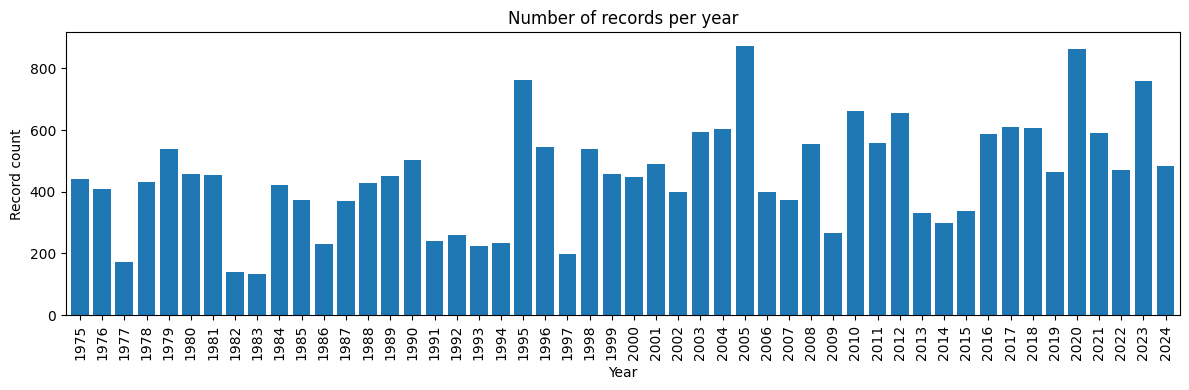

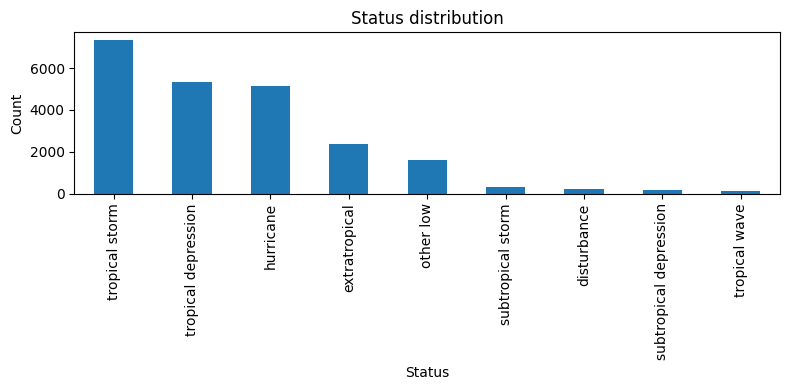

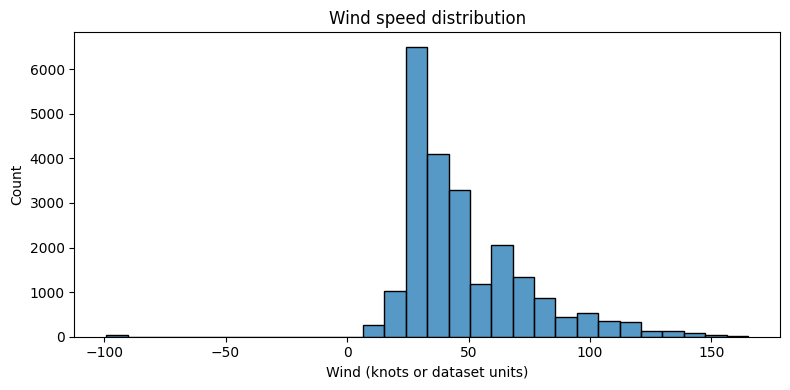

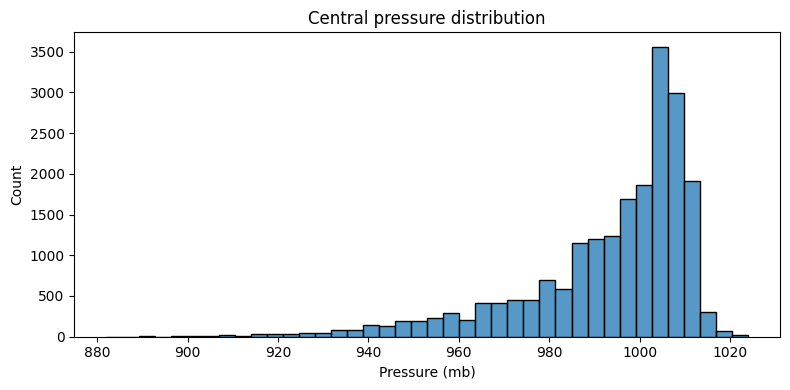

In [14]:

if 'year' in storms_clean.columns:
    plt.figure(figsize=(12,4))
    storms_clean['year'].value_counts().sort_index().plot(kind='bar', width=0.8)
    plt.title('Number of records per year')
    plt.xlabel('Year'); plt.ylabel('Record count')
    plt.tight_layout()
    plt.show()


plt.figure(figsize=(8,4))
storms_clean['status'].value_counts().plot(kind='bar')
plt.title('Status distribution')
plt.xlabel('Status'); plt.ylabel('Count')
plt.tight_layout()
plt.show()


plt.figure(figsize=(8,4))
sns.histplot(storms_clean['wind'].dropna(), bins=30, kde=False)
plt.title('Wind speed distribution')
plt.xlabel('Wind (knots or dataset units)')
plt.tight_layout()
plt.show()


if 'pressure' in storms_clean.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(storms_clean['pressure'].dropna(), bins=40)
    plt.title('Central pressure distribution')
    plt.xlabel('Pressure (mb)')
    plt.tight_layout()
    plt.show()


In [ ]:

# Create a datetime column
storms_clean['datetime'] = pd.to_datetime(
    storms_clean[['year','month','day','hour']].rename(columns={'hour':'hour'})
    , errors='coerce'
)

# Now define your aggregation
agg_funcs = {
    'datetime': ['min','max'],
    'wind': ['max','mean','median'],
    'pressure': ['min','mean'],
    'lat': ['mean'],
    'long': ['mean'],
    'category': ['max']
}

# Groupby and aggregate
storms_agg = storms_clean.groupby('name').agg(agg_funcs)
storms_agg.columns = ['_'.join(col).strip() for col in storms_agg.columns.values]
storms_agg = storms_agg.reset_index()

# Calculate lifetime in hours
storms_agg['lifetime_hours'] = (storms_agg['datetime_max'] - storms_agg['datetime_min']).dt.total_seconds() / 3600.0

storms_agg.head()


KeyError: "Column(s) ['datetime'] do not exist"

Top 10 storms by max wind:


,name,wind_max,pressure_min,datetime_min,datetime_max,lifetime_hours
68,Allen,165,899.0,1980-07-31 12:00:00,1980-08-11 18:00:00,270.0
196,Gilbert,160,888.0,1988-09-08 18:00:00,1988-09-20 00:00:00,270.0
144,Dorian,160,910.0,2013-07-22 18:00:00,2019-09-09 00:00:00,53742.0
134,Wilma,160,882.0,2005-10-15 18:00:00,2005-10-26 18:00:00,264.0
115,Mitch,155,905.0,1998-10-22 00:00:00,1998-11-09 18:00:00,450.0
172,Milton,155,895.0,2024-10-04 18:00:00,2024-10-11 18:00:00,168.0
61,Rita,155,895.0,2005-09-18 00:00:00,2005-09-26 00:00:00,192.0
39,Irma,155,914.0,1978-10-02 12:00:00,2017-09-13 12:00:00,341424.0
80,David,150,924.0,1979-08-25 12:00:00,1979-09-08 00:00:00,324.0
91,Felix,150,929.0,1989-08-26 00:00:00,2007-09-06 18:00:00,158058.0


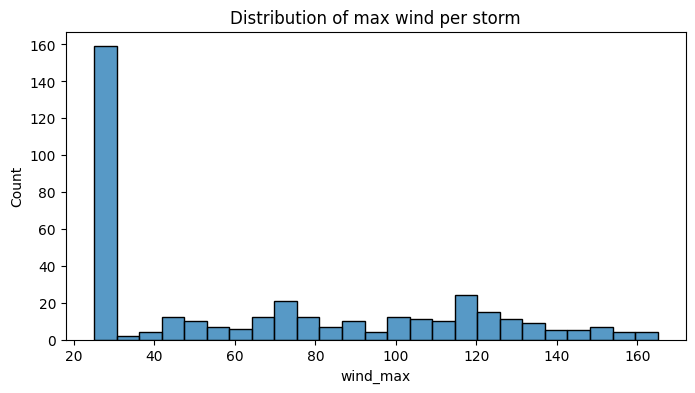

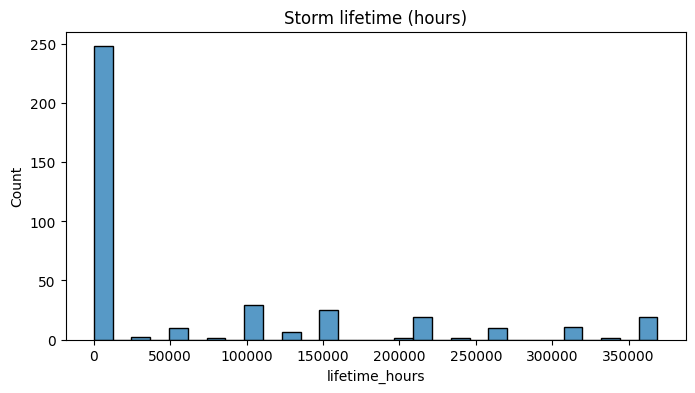

In [21]:

print("Top 10 storms by max wind:")
display(storms_agg.sort_values('wind_max', ascending=False).head(10)[[group_key,'wind_max','pressure_min','datetime_min','datetime_max','lifetime_hours']])

plt.figure(figsize=(8,4))
sns.histplot(storms_agg['wind_max'].dropna(), bins=25)
plt.title('Distribution of max wind per storm')
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(storms_agg['lifetime_hours'].dropna(), bins=30)
plt.title('Storm lifetime (hours)')
plt.show()


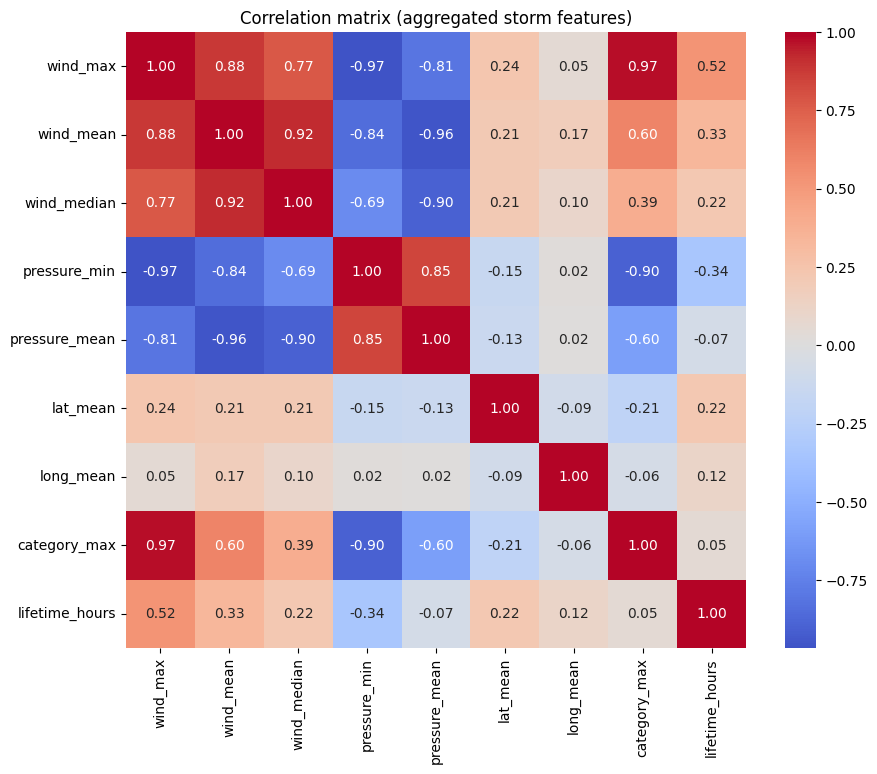

In [22]:

num_cols = storms_agg.select_dtypes(include=[np.number]).columns.tolist()
corr = storms_agg[num_cols].corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title('Correlation matrix (aggregated storm features)')
plt.show()


In [23]:
# Feature Selection
# Load dataset
storms_df = pd.read_csv("storms.csv")

storms_clean = storms_df.replace({
    "pressure": {-999: np.nan},
    "tropicalstorm_force_diameter": {-1998: np.nan},
    "hurricane_force_diameter": {-1998: np.nan}
})

print("Available columns:\n", storms_clean.columns.tolist())
X = storms_clean[["wind", "pressure", "hurricane_force_diameter"]]
y = storms_clean["category"].fillna("Unknown")
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


Available columns:
 ['name', 'year', 'month', 'day', 'hour', 'lat', 'long', 'status', 'category', 'wind', 'pressure', 'tropicalstorm_force_diameter', 'hurricane_force_diameter']


In [24]:
print("X_train", X_train)

X_train        wind  pressure  hurricane_force_diameter
18194    55     982.0                       0.0
19905    50     996.0                       0.0
5300     95     951.0                       NaN
7403     30    1008.0                       NaN
3251     30    1010.0                       NaN
...     ...       ...                       ...
11964    30    1003.0                       0.0
21575    30    1010.0                       0.0
5390     30    1008.0                       NaN
860      30       NaN                       NaN
15795    45    1003.0                       0.0

[15893 rows x 3 columns]


In [25]:
print("X_test", X_test)

X_test        wind  pressure  hurricane_force_diameter
14202    35    1004.0                       0.0
10978   115     939.0                       NaN
3106     65     991.0                       NaN
21395    35    1005.0                       0.0
16215    40     978.0                       0.0
...     ...       ...                       ...
617      80       NaN                       NaN
13008    35    1002.0                       0.0
1310     20       NaN                       NaN
12539    35    1003.0                       0.0
1012     40    1008.0                       NaN

[6812 rows x 3 columns]


In [26]:
print("y_train", y_train)

y_train 18194    Unknown
19905    Unknown
5300         2.0
7403     Unknown
3251     Unknown
          ...   
11964    Unknown
21575    Unknown
5390     Unknown
860      Unknown
15795    Unknown
Name: category, Length: 15893, dtype: object


In [27]:
print("y_test", y_test)

y_test 14202    Unknown
10978        4.0
3106         1.0
21395    Unknown
16215    Unknown
          ...   
617          1.0
13008    Unknown
1310     Unknown
12539    Unknown
1012     Unknown
Name: category, Length: 6812, dtype: object


In [28]:

df["pressure"] = df["pressure"].astype(float)
df.loc[:, "pressure"] = df["pressure"].replace(-999, np.nan)
df.loc[:, "pressure"] = df["pressure"].fillna(df["pressure"].median())



In [29]:
X = X.apply(pd.to_numeric, errors='coerce')
X = X.fillna(X.median())

In [30]:
# Ensure target column is numeric (0 or 1)
df["target"] = df["target"].astype(int)

# Features
X = df[['year','month','day','hour','lat','long','wind','pressure']]
y = df['target']


KeyError: 'target'

In [31]:
# In [4]: Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [32]:
print(y.unique())
print(y.dtype)


['Unknown' 1.0 3.0 2.0 4.0 5.0]
object


In [33]:
# In [5]: Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [34]:
# In [6]: Training the Model
model = RandomForestClassifier(n_estimators=200, random_state=42)
model.fit(X_train, y_train)


TypeError: '<' not supported between instances of 'float' and 'str'

In [37]:
# In [7]: Checking the Accuracy of the Trained Model
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))


Model Accuracy: 1.0


In [ ]:
print("\n--- Hurricane Prediction System ---")
lat = float(input("Enter latitude: "))
long = float(input("Enter longitude: "))
wind = float(input("Enter wind speed (knots): "))
pressure = float(input("Enter pressure (mb): "))


user_data = pd.DataFrame([[2025, 9, 12, 12, lat, long, wind, pressure]],
columns=['year','month','day','hour','lat','long','wind','pressure'])
user_data = scaler.transform(user_data)

# Predicting Outcome
prediction = model.predict(user_data)
if prediction[0] == 1:
    print("⚠️ Hurricane predicted in this area!")
else:
    print("✅ No hurricane predicted.")
